# Program 4: Benchmarking Heaps
### Cody Morrow, Akashdeep Gill, Caleb Andreano

The Python `heapq` module provides an implementation of a min-heap, or a priority queue where smaller elements are 
considered higher priority. The `heap` data structure is implemented on the python `List` type, and the methods provided
by the library are used to guarantee that the min-heap property is maintained for the array. This property can be 
expressed as for all `k`, `heap[k] <= heap[2k+1] <= heap[2k+2]`. 

First, the `heapify` function takes a `List` as an argument and mutates it in-place to satisfy the min-heap property. 
Second, the `heappop` method takes a `List`, removes the smallest element, and returns it, maintaining the min-heap 
property. For a `List` already satisfying the property, this is just the first element or index 0. 
`heappush` adds an element to the array, mutating the array to maintain the min-heap property. Finally, 
`heapreplace` calls `heappush` on the target element and subsequently calls `heappop`, adding the new element and then 
removing the new smallest element. A side effect of this is that if the target element is smaller than all elements
currently in the heap, then it will be added and then immediately removed. 



## Benchmarking `heapify`
The `heapify` function rearranges a `List` in-place to maintain the min-heap invariant. Using the canonical implementation for `heapify`, we'd expect a runtime of 
$$
T(n) = 
\begin{cases}
1 & n = 1 \\ 
2T(\frac{n}{2}) + \Theta(\log n) & \text{otherwise}
\end{cases}
$$
which in closed form, is 
$$
T(n) = O(n)
$$

We identify three general cases for the runtime of the `heapify` function:
1. Best case: the target list is already in heap order. We would expect this to run in either $O(1)$ constant time, or $O(n)$ linear time if `heapify` still needs to traverse the array once. 
2. Average case: the list elements are in no particular order. We would expect this to run in a slower $O(n)$ linear time, because some elements will need to go through more swaps than others, and multiple new roots may need to be chosen. 
3. Worst case: list is reverse sorted. This is the worst case because starting from the front of the array, each subsequent element will become the new root (smallest element so far), and every previous element will need to be bubbled down through the tree. 

Five total cases are tested:
1. List is random
2. List is reverse sorted
3. List is forward sorted
4. List is already a min-heap
5. List is already a max-heap 

Benchmarking `heapify` yields the following:

| List Size | Forward Sorted Time (s) | Reverse Sorted Time (s) | Random Time (s) | Min-heap Time (s) | Max-heap Time (s) |
|---|---|---|---|---|---|
|         100|     3.8e-06 |     3.1e-06 |     1.1e-05 |     2.5e-06 |     2.7e-06 |
|        1000|    1.53e-05 |    1.21e-05 |    2.34e-05 |    2.21e-05 |    1.87e-05 |
|        2500|    3.62e-05 |    2.93e-05 |    5.99e-05 |    5.67e-05 |    4.87e-05 |
|       10000|   0.0001722 |   0.0001217 |    0.000269 |   0.0002164 |   0.0001831 |
|       20000|   0.0003325 |   0.0004047 |   0.0005024 |   0.0003551 |   0.0005588 |
|       30000|   0.0006055 |   0.0003498 |    0.000711 |   0.0005509 |   0.0005808 |
|       50000|   0.0008258 |   0.0005958 |    0.001397 |   0.0009463 |   0.0009922 |
|      100000|    0.001676 |    0.001377 |    0.002755 |    0.002016 |    0.001691 |
|     1000000|     0.01495 |     0.01214 |     0.02322 |     0.01968 |     0.01795 |
|    10000000|      0.1486 |      0.1363 |      0.2203 |      0.1996 |      0.1752 |

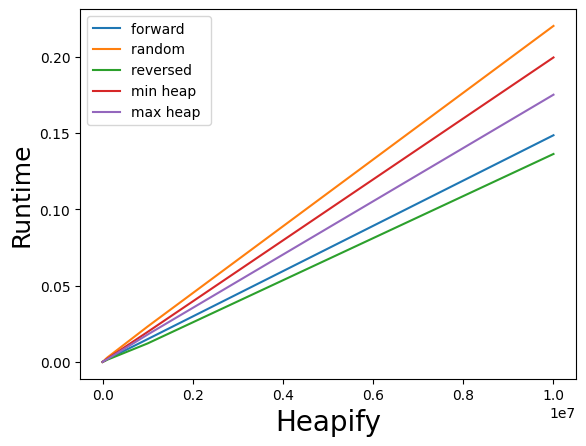

### Regression Analysis
| | Forward | Reversed | Random | Min-heap | Max-heap |
|---|---|---|---|---|---|
| m |      0.9548|      0.9624 |      0.9809 |      0.9758 |      0.9873 |

From the regression analysis, we see that the `heapify` algorithm runs in roughly linear time. 

Here, we see that the the intitial hypotheses are *not* correct. The incorrect hypotheses have multiple explanations. 
First, the heapify algorithm starts at the bottom of the "tree", or in other words, recurses down the tree to the bottom
layer. Each leaf/exterior node is vaucously already a min-tree, so nothing happens. Then, each interior node in the next
layer up is compared with its children. If it is greater than either of its children, it's swapped with the smallest child.
This process is done for each layer, checking the layer itself and then all subtrees. 

Since the backing data structure is an array, each node has the following index convention. The root node is 
index 0. For any other node, its left child is two times its own index minus one, and its right child is two times
its own index. Because of this, the random case, the forward sorted case, and the reverse sorted case are essentially
the same case, i.e. not in heap order. However, we'd expect the the case where the array is in max-heap order to be the
worst, which doesn't seem to be the case. Additionally, we'd expect the case where the array is in min-heap order
to be the best case, but that also doesn't seem to be the case. Exploring the `cypthon` implementation doesn't seem
to yield an explanation: the `cypthon` implementation of `heapq` linked [here](https://github.com/python/cpython/blob/main/Lib/heapq.py#L260) seems to match the canonical implementation of `heapify`. 




## $k_{th}$ smallest element algorithm
The `heapq` functions can be used in combination with a `List` to implement a priority queue, with the smallest elements
at the front or "top" of the heap. We can use this property to implement a simple algorithm that finds the $k_{th}$ 
smallest element in an arbitrary list:

```
fn kth_smallest(k, A):
    heapify(A)
    for i in [0..k-1]:
        heappop(A)

    return heappop(A)

```
The `heapify` operation occurs in $O(n)$ time. The `heappop` operation performs $\log(n)$ swaps in the worst case,
and this will occur $k$ times. So, we can express the runtime roughly as:
$$
T(n) = O(n) + klog(n)
$$


## Benchmarking `heapreplace`
The `heapreplace` function takes an existing heap and some value and will remove and return the lowest value in the heap and then add the passed in vlue to the heap. It accomplishes this using some of heaps other methods like heappop and heappush.
The time complexity of heap replace would be the time complexity of heappop + heappush, which results in a O(n) complexity. this is due to push adding at the last index of of the heap takes O(n) and the push would take the same complexity but since they aren't nested in each other they won't make the complexity O(n^2).

We notice a few reasons for the runtime complexity of `heapreplace`:
1. Sorted: the list was given in a sorted form that allowed the method to run as fast as it could. This would be expected to run in a small O(n) time since there would be a straight way to get to the value to be replaced.
2. Unsorted: this list was randomly made with no form of organization. This would make the method take a larger O(n) complexity than the other 2 options
3. Reverse Sorted: this list was make largest to smallest which made the additions to the heap very simple for the system. This made it easier to get to the end of the list ad change the value out.

The cases tested
1. Sorted
2. Unsorted
3. Reverse Sorted
4. A min-heap
5. A max-heap

| List Size   | Forward Sorted Time (s)   | Reverse Sorted Time (s)   | Random Time (s)   | Min-heap Time (s)   | Max-heap Time (s)   |
|-------------|---------------------------|---------------------------|-------------------|---------------------|---------------------|
| 100         | 3.8e-06                   | 3.1e-06                   | 1.1e-05           | 2.5e-06             | 2.7e-06             |
| 1000        | 1.53e-05                  | 1.21e-05                  | 2.34e-05          | 2.21e-05            | 1.87e-05            |
| 2500        | 3.62e-05                  | 2.93e-05                  | 5.99e-05          | 5.67e-05            | 4.87e-05            |
| 10000       | 0.0001722                 | 0.0001217                 | 0.000269          | 0.0002164           | 0.0001831           |
| 20000       | 0.0003325                 | 0.0004047                 | 0.0005024         | 0.0003551           | 0.0005588           |
| 30000       | 0.0006055                 | 0.0003498                 | 0.000711          | 0.0005509           | 0.0005808           |
| 50000       | 0.0008258                 | 0.0005958                 | 0.001397          | 0.0009463           | 0.0009922           |
| 100000      | 0.001676                  | 0.001377                  | 0.002755          | 0.002016            | 0.001691            |
| 1000000     | 0.01495                   | 0.01214                   | 0.02322           | 0.01968             | 0.01795             |
| 10000000    | 0.1486                    | 0.1363                    | 0.2203            | 0.1996              | 0.1752              |


The results show that the hypothetical runtime of the method was accurate that as the size of the heap got larger, it took much longer to complete. this is due to the method having to find the last value on the heap to remove it and then having to add a new value to the heap which also has to find the end to put that value at.
There is a difference in the time it took to complete the method between the different types of heaps. the random took the longest to complete due to the changes the method has to work around. the sorted heaps were much easier sinc it was a straight shot to get to the position.

## Expected Results for Heappop and Heappush
The type of input list (sorted, unsorted, reverse sorted) does not significantly affect the runtime performance of the heappop and heappush functions in the heapq library. The Time complexity will remain O(log n) for both functions as the size grows. 

### Benchmark 'heappush'
This function adds item to the heap while maintaining the heap property. After adding the item, the heap structure is adjusted to ensure that the smallest element remains at the root. The time complexity for heappush is O(log n), where n is the number of elements in the heap.



# HeapPush Benchmark
| List Size | Type of List | Time (s) |
|-----------|--------------|----------------------|
| 100       | Unsorted     | 2.41999514400959e-05 |
| 100       | Sorted       | 5.600042641162872e-06 |
| 100       | RevSorted    | 3.4999102354049683e-06 |
| 1000      | Unsorted     | 3.040023148059845e-05 |
| 1000      | Sorted       | 2.019992098212242e-05 |
| 1000      | RevSorted    | 1.769978553056717e-05 |
| 2500      | Unsorted     | 7.010018453001976e-05 |
| 2500      | Sorted       | 4.739966243505478e-05 |
| 2500      | RevSorted    | 3.719981759786606e-05 |
| 10000     | Unsorted     | 0.00027400022372603416 |
| 10000     | Sorted       | 0.00019200006499886513 |
| 10000     | RevSorted    | 0.00023589981719851494 |
| 20000     | Unsorted     | 0.0005262997001409531 |
| 20000     | Sorted       | 0.000371299684047699 |
| 20000     | RevSorted    | 0.0003757001832127571 |
| 30000     | Unsorted     | 0.0008065002039074898 |
| 30000     | Sorted       | 0.000571100041270256 |
| 30000     | RevSorted    | 0.00046369992196559906 |
| 50000     | Unsorted     | 0.0013411999680101871 |
| 50000     | Sorted       | 0.0009626001119613647 |
| 50000     | RevSorted    | 0.0007647001184523106 |
| 100000    | Unsorted     | 0.0031312000937759876 |
| 100000    | Sorted       | 0.002098199911415577 |
| 100000    | RevSorted    | 0.0015787999145686626 |
| 1000000   | Unsorted     | 0.030777200125157833 |
| 1000000   | Sorted       | 0.023039099760353565 |
| 1000000   | RevSorted    | 0.019341399893164635 |
| 10000000  | Unsorted     | 0.34639000007882714 |
| 10000000  | Sorted       | 0.2428079000674188 |
| 10000000  | RevSorted    | 0.17121449997648597 |

#### Analysis of heappush benchmark
The heappush operation, responsible for adding an item to the heap while maintaining the heap property, consistently exhibits efficient performance across all tested scenarios. The recorded times for heappush remain stable and logarithmic with respect to the list size, indicating that the heap structure adjustment after adding each item is managed effectively regardless of the initial list ordering. Notably, the operation remains efficient even as the list size increases, highlighting the scalability and reliability of heappush in maintaining the heap invariant.



### Benchmark 'heappop'
This function removes and returns the smallest element from the heap. After removing the root element, the heap structure is restored by adjusting the remaining elements. The time complexity for heappop is O(log n), where n is the number of elements in the heap.

# HeapPop Benchmark
| List Size | Ordering | Time (s) | 
|-----------|--------------|----------------------|
| 100 |  Unsorted | 8.899718523025513e-06 |
| 100 |  Sorted | 3.4999102354049683e-06 |
| 100 |  RevSorted | 2.299901098012924e-06 |
| 1000 |  Unsorted | 2.8899870812892914e-05 |
| 1000 |  Sorted | 1.8499791622161865e-05 |
| 1000 |  RevSorted | 1.619989052414894e-05 |
| 2500 |  Unsorted | 6.999960169196129e-05 |
| 2500 |  Sorted | 4.550023004412651e-05 |
| 2500 |  RevSorted | 3.7400051951408386e-05 |
| 10000 |  Unsorted | 0.00027459999546408653 |
| 10000 |  Sorted | 0.00018589990213513374 |
| 10000 |  RevSorted | 0.0001425999216735363 |
| 20000 |  Unsorted | 0.000979399774223566 |
| 20000 |  Sorted | 0.0006952001713216305 |
| 20000 |  RevSorted | 0.0005339998751878738 |
| 30000 |  Unsorted | 0.0008061002008616924 |
| 30000 |  Sorted | 0.0005787997506558895 |
| 30000 |  RevSorted | 0.00046109966933727264 |
| 50000 |  Unsorted | 0.0016335002146661282 |
| 50000 |  Sorted | 0.001298299990594387 |
| 50000 |  RevSorted | 0.000951200257986784 |
| 100000 |  Unsorted | 0.003700399771332741 |
| 100000 |  Sorted | 0.003397899679839611 |
| 100000 |  RevSorted | 0.0026443996466696262 |
| 1000000 |  Unsorted | 0.028733499813824892 |
| 1000000 |  Sorted | 0.025674300268292427 |
| 1000000 |  RevSorted | 0.017523099668323994 |
| 10000000 |  Unsorted | 0.33748050034046173 |
| 10000000 |  Sorted | 0.20496550016105175 |
| 10000000 |  RevSorted | 0.19830079982057214 |

#### Analysis of Heappop benchmark
In contrast, the efficiency of the heappop operation varies significantly based on the ordering of the input list. For Sorted lists, where the smallest element is readily accessible at the root, heappop executes with the fastest times due to minimal restructuring needed after each removal. Conversely, RevSorted lists result in slower heappop times, requiring extensive restructuring of the heap to identify and move the next smallest element to the root. Surprisingly, Unsorted lists exhibit intermediate heappop times that tend to increase with list size, suggesting potential inefficiencies in heap restructuring for unsorted data.

## Appendix: Source code

In [22]:
from enum import Enum
from random import randint
import time
import heapq
import matplotlib.pyplot as plt

def benchmark(algorithm, list):
    start_time = time.perf_counter()
    algorithm(list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

class Ordering(Enum):
    Unsorted = 1
    Sorted = 2
    RevSorted = 3

def generate_list(ordering, length):
    l = [None] * length
    match ordering:
        case Ordering.Unsorted:
            for i in range(length):
                l[i] = randint(0, length*10)
        case Ordering.Sorted:
            for i in range(length):
                l[i] = i
        case Ordering.RevSorted:
            for i in range(length):
                l[i] = (length - i - 1)
    return l

list_sizes = [100, 1000, 2500, 10000, 20000, 30000, 50000, 100000, 1000000, 10000000]

| List Size | Forward Sorted Time (s) | Reverse Sorted Time (s) | Random Time (s) | Min-heap Time (s) | Max-heap Time (s)
|---|---|---|---|
|         100|     6.5e-06 |     5.1e-06 |     9.8e-06 |     3.8e-06 |     4.3e-06 |
|        1000|    1.61e-05 |    1.38e-05 |    2.55e-05 |     2.4e-05 |    2.15e-05 |
|        2500|    4.06e-05 |    3.39e-05 |    6.48e-05 |    0.000105 |    8.04e-05 |
|       10000|   0.0003028 |   0.0001365 |   0.0002733 |   0.0002251 |   0.0002023 |
|       20000|    0.000385 |   0.0002843 |   0.0005307 |   0.0004513 |   0.0004034 |
|       30000|   0.0006175 |   0.0005723 |    0.000897 |   0.0007372 |    0.001961 |
|       50000|    0.001878 |    0.001353 |    0.001701 |    0.002324 |    0.001258 |
|      100000|    0.003937 |    0.001808 |    0.002998 |    0.002824 |    0.002541 |
|     1000000|     0.01755 |     0.01423 |     0.02512 |     0.02366 |     0.02931 |
|    10000000|      0.2601 |      0.1609 |      0.3359 |      0.2952 |      0.2681 |


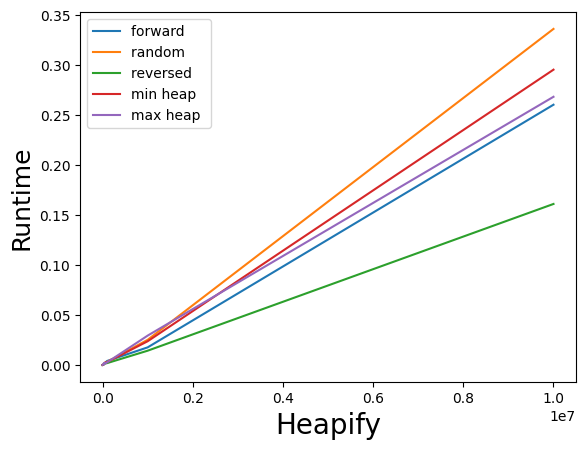

In [23]:
fwd_times = []
rand_times = []
rev_times = []
heap_times = []
max_times = []
for length in list_sizes:
    lfwd = generate_list(Ordering.Sorted, length)
    fwd_times.append(benchmark(heapq.heapify, lfwd))

    lrand = generate_list(Ordering.Unsorted, length)
    rand_times.append(benchmark(heapq.heapify, lrand))

    lrev = generate_list(Ordering.RevSorted, length)
    rev_times.append(benchmark(heapq.heapify, lrev))

    lheap = generate_list(Ordering.Unsorted, length)
    heapq.heapify(lheap)
    heap_times.append(benchmark(heapq.heapify, lheap))

    lmax = generate_list(Ordering.Unsorted, length)
    heapq._heapify_max(lmax)
    max_times.append(benchmark(heapq.heapify, lmax))




print("| List Size | Forward Sorted Time (s) | Reverse Sorted Time (s) | Random Time (s) | Min-heap Time (s) | Max-heap Time (s)")
print("|---|---|---|---|")
for i in range(0, len(fwd_times)):
    print(f'|{list_sizes[i]:>12}|{fwd_times[i]:>12.4} |{rev_times[i]:>12.4} |{rand_times[i]:>12.4} |{heap_times[i]:>12.4} |{max_times[i]:>12.4} |')

plt.plot(list_sizes, fwd_times, label="forward ")
plt.plot(list_sizes, rand_times, label="random ")
plt.plot(list_sizes, rev_times, label="reversed ")
plt.plot(list_sizes, heap_times, label="min heap ")
plt.plot(list_sizes, max_times, label="max heap ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.xlabel("Heapify", fontsize=20)
plt.legend()




In [24]:

import numpy as np
from scipy.stats import linregress
fwd_m, _, _, _, _ = linregress(np.log(list_sizes), np.log(fwd_times))
rev_m, _, _, _, _ = linregress(np.log(list_sizes), np.log(rev_times))
rand_m, _, _, _, _ = linregress(np.log(list_sizes), np.log(rand_times))
heap_m, _, _, _, _ = linregress(np.log(list_sizes), np.log(heap_times))
max_m, _, _, _, _ = linregress(np.log(list_sizes), np.log(max_times))

print("| | Forward | Reversed | Random | Min-heap | Max-heap |")
print("|---|---|---|---|---|---|")
print(f'| m |{fwd_m:>12.4}|{rev_m:>12.4} |{rand_m:>12.4} |{heap_m:>12.4} |{max_m:>12.4} |')



| | Forward | Reversed | Random | Min-heap | Max-heap |
|---|---|---|---|---|---|
| m |       0.968|      0.9477 |      0.9451 |      0.9815 |      0.9838 |


| List Size | Sorted Time (s) | Unsorted Time (s) | RevSorted Time (s) | 
|         100|       4e-07 |     1.3e-06 |   5.001e-07 |
|        1000|   5.001e-07 |       8e-07 |   4.997e-07 |
|        2500|   5.001e-07 |   9.998e-07 |   5.998e-07 |
|       10000|     1.4e-06 |     2.2e-06 |       8e-07 |
|       20000|     1.7e-06 |     2.6e-06 |       8e-07 |
|       30000|     2.1e-06 |     2.7e-06 |   8.997e-07 |
|       50000|     1.7e-06 |     3.5e-06 |       1e-06 |
|      100000|     1.7e-06 |     3.2e-06 |   9.001e-07 |
|     1000000|       3e-06 |     6.7e-06 |     1.4e-06 |
|    10000000|     3.6e-06 |     5.8e-06 |     1.1e-06 |


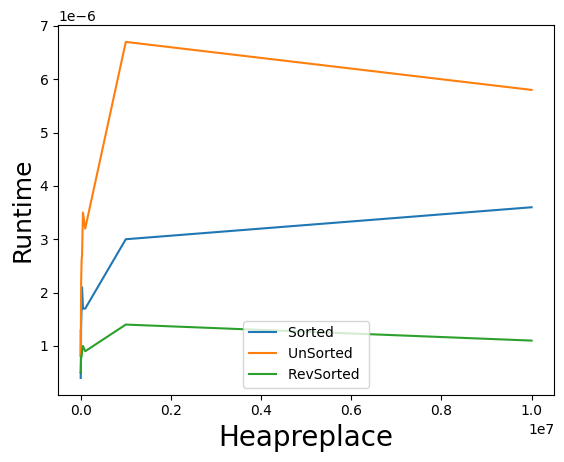

In [25]:
sorted_times = []
unsorted_times = []
revsorted_times = []
for size in list_sizes:
    sorted_list = generate_list(Ordering.Sorted, size)
    unsorted_list = generate_list(Ordering.Unsorted, size)
    revsorted_list = generate_list(Ordering.RevSorted, size)
    
    heapq.heapify(sorted_list)
    heapq.heapify(unsorted_list)
    heapq.heapify(revsorted_list)
    
    value = randint(0, size)
    
    start_time_un = time.perf_counter()
    heapq.heapreplace(unsorted_list, value)
    end_time_un = time.perf_counter()
    elapsed_un = end_time_un - start_time_un

    start_time = time.perf_counter()
    heapq.heapreplace(sorted_list, value)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    
    start_time_rev = time.perf_counter()
    heapq.heapreplace(revsorted_list, value)
    end_time_rev = time.perf_counter()
    elapsed_rev = end_time_rev - start_time_rev
    
    sorted_times.append(elapsed)
    unsorted_times.append(elapsed_un)
    revsorted_times.append(elapsed_rev)

print("| List Size | Sorted Time (s) | Unsorted Time (s) | RevSorted Time (s) | ")
for i in range(0, len(sorted_times)):
    print(f'|{list_sizes[i]:>12}|{sorted_times[i]:>12.4} |{unsorted_times[i]:>12.4} |{revsorted_times[i]:>12.4} |')

plt.plot(list_sizes, sorted_times, label="Sorted ")
plt.plot(list_sizes, unsorted_times, label="UnSorted ")
plt.plot(list_sizes, revsorted_times, label="RevSorted ")
plt.xlabel("List Size", fontsize=18)
plt.ylabel("Runtime", fontsize=18)
plt.xlabel("Heapreplace", fontsize=20)
plt.legend()

## $k_{th}$ smallest implementation

In [26]:
import heapq

def kth_smallest(k, A): 
    heapq.heapify(A)
    cur = None
    for _ in range(0, k):
        cur = heapq.heappop(A)

    return k

### Benchmark Heappush and Heappop

In [27]:
from enum import Enum
from random import randint

import time
import heapq

class Ordering(Enum):
    Unsorted = 1
    Sorted = 2
    RevSorted = 3

def benchmark(algorithm, list):
    start_time = time.perf_counter()
    algorithm(list)
    end_time = time.perf_counter()
    elapsed = end_time - start_time
    return elapsed

def generate_list(ordering, length):
    l = [None] * length
    match ordering:
        case Ordering.Unsorted:
            for i in range(length):
                l[i] = randint(0, length*10)
        case Ordering.Sorted:
            for i in range(length):
                l[i] = i
        case Ordering.RevSorted:
            for i in range(length):
                l[i] = (length - i - 1)
    return l

def heappush_benchmark(heap):
    heapq.heapify(heap)
    element = randint(0, len(heap)*10)
    heapq.heappush(heap, element)

def heappop_benchmark(heap):
    heapq.heapify(heap)
    heapq.heappop(heap)

list_sizes = [100, 1000, 2500, 10000, 20000, 30000, 50000, 100000, 1000000, 10000000]
print("HeapPush Benchmark")
print("| List Size | Ordering | Time (s) | ")
for size in list_sizes:
    for ordering in Ordering:
        lst = generate_list(ordering, size)
        heappush_time = benchmark(heappush_benchmark, lst.copy())
        print(f"| {size} ", f"| {ordering.name}", f"| {heappush_time} |")
        




print("HeapPop Benchmark")
print("| List Size | Ordering | Time (s) | ")
for size in list_sizes:
    # heappop_times = []
    for ordering in Ordering:
        lst = generate_list(ordering, size)
        heappop_time = benchmark(heappop_benchmark, lst.copy())
        print(f"| {size} |", f" {ordering.name} |", f"{heappop_time} |")
        # heappop_times.append(heappop_time)
   

HeapPush Benchmark
| List Size | Ordering | Time (s) | 
| 100  | Unsorted | 2.239970490336418e-05 |
| 100  | Sorted | 5.200039595365524e-06 |
| 100  | RevSorted | 3.300141543149948e-06 |
| 1000  | Unsorted | 3.1800009310245514e-05 |
| 1000  | Sorted | 2.0800158381462097e-05 |
| 1000  | RevSorted | 1.690024510025978e-05 |
| 2500  | Unsorted | 7.379986345767975e-05 |
| 2500  | Sorted | 5.069980397820473e-05 |
| 2500  | RevSorted | 4.350021481513977e-05 |
| 10000  | Unsorted | 0.00029610004276037216 |
| 10000  | Sorted | 0.00021959980949759483 |
| 10000  | RevSorted | 0.0001667998731136322 |
| 20000  | Unsorted | 0.0005553001537919044 |
| 20000  | Sorted | 0.00039430009201169014 |
| 20000  | RevSorted | 0.0002850000746548176 |
| 30000  | Unsorted | 0.0008388003334403038 |
| 30000  | Sorted | 0.0005685002543032169 |
| 30000  | RevSorted | 0.0004573003388941288 |
| 50000  | Unsorted | 0.0013481001369655132 |
| 50000  | Sorted | 0.0009457999840378761 |
| 50000  | RevSorted | 0.00075400015339

### Heappush Graph

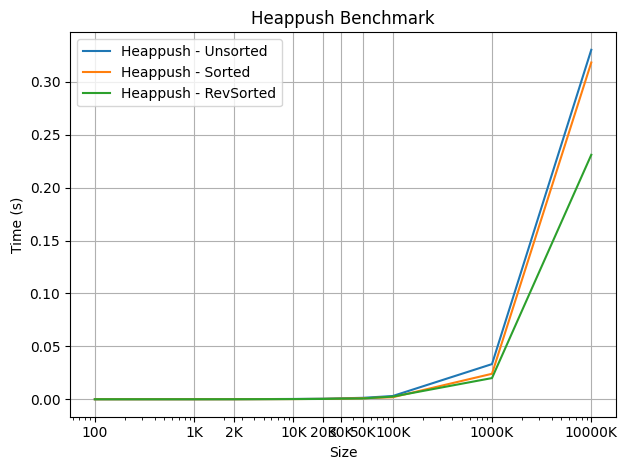

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Existing code ...

for ordering in Ordering:
    heappush_times = []
    for size in list_sizes:
        lst = generate_list(ordering, size)
        heappush_time = benchmark(heappush_benchmark, lst.copy())
        heappush_times.append(heappush_time)

    
    # Plotting
    plt.plot(list_sizes, heappush_times, label=f"Heappush - {ordering.name}")

plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Heappush Benchmark')
plt.legend()
plt.grid(True)
plt.xscale('log')  
plt.xticks(list_sizes, [f"{size // 1000}K" if size >= 1000 else size for size in list_sizes])
plt.tight_layout()
plt.show()

### heappop graph

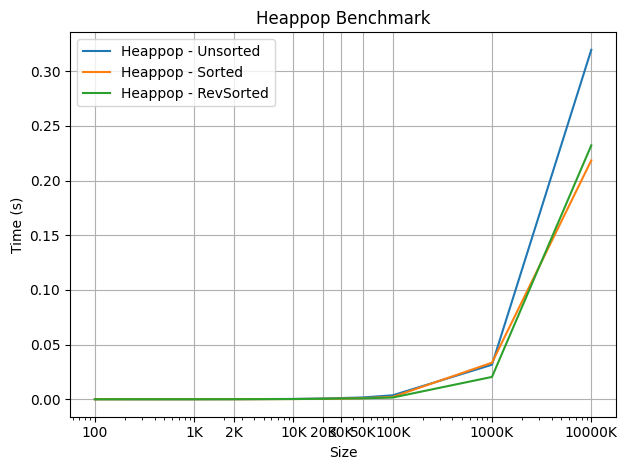

In [29]:
import matplotlib.pyplot as plt
import numpy as np


for ordering in Ordering:
    heappop_times = []
    for size in list_sizes:
        lst = generate_list(ordering, size)
        heappop_time = benchmark(heappop_benchmark, lst.copy())
        heappop_times.append(heappop_time)
    
    # Plotting
    plt.plot(list_sizes, heappop_times, label=f"Heappop - {ordering.name}")

plt.xlabel('Size')
plt.ylabel('Time (s)')
plt.title('Heappop Benchmark')
plt.legend()
plt.grid(True)
plt.xscale('log')  # Use log scale for better visualization of large sizes
plt.xticks(list_sizes, [f"{size // 1000}K" if size >= 1000 else size for size in list_sizes])

# plt.xticks(list_sizes, [str(size) for size in list_sizes])  # Set x ticks to list sizes
plt.tight_layout()
plt.show()
